In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x= plt.imread(r'C:\Users\Raghav\Documents\AI Councel Lab\DSC_0064.jpg')

In [2]:
x

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  5,   5,   5]],

       [[  0,   0,   0],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [249, 249, 249],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  4,   4,   4],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [  1,   1,   1]],

       ...,

       [[  0,   4,  10],
        [ 94, 101, 111],
        [ 95, 101, 113],
        ...,
        [ 65,  68,  77],
        [ 45,  48,  55],
        [  1,   2,   7]],

       [[  0,   5,   5],
        [ 83,  88,  91],
        [100, 105, 111],
        ...,
        [ 57,  60,  67],
        [ 44,  45,  50],
        [  6,   7,  11]],

       [[  0,   2,   0],
        [  9,  14,  10],
        [  0,   1,   0],
        ...,
        [  0,   2,   5],
        [  2,   3,   7],
        [  0,   0,   2]]

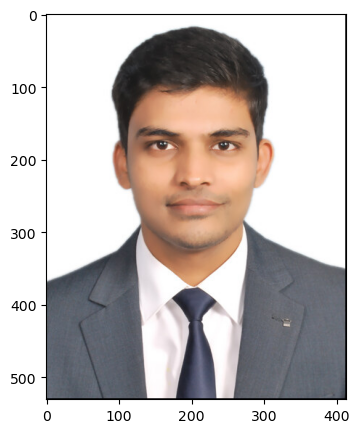

In [3]:
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(x)

In [5]:
print('Shape of the image is:', x.shape)

Shape of the image is: (531, 413, 3)


# We are building a image classifier using ANN. 

In [11]:
import numpy as np

url = "https://raw.githubusercontent.com/venkatareddykonasani/book-machine-learning-and-deep-learning-using-python-and-tensorflow/main/Chapter8_ANN/datasets/USPS/USPS_train.txt"
digits_data = np.loadtxt(url)


In [12]:
digits_data.shape

(7291, 257)

In [17]:
#convert it from np array to data frame

digits_data= pd.DataFrame(digits_data)
digits_data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.631,0.862,...,0.304,0.823,1.0,0.482,-0.474,-0.991,-1.0,-1.0,-1.0,-1.0


In [14]:
digits_data.shape

(7291, 257)

In [15]:
digits_data.size

1873787

In [16]:
digits_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


we can see that we have 256 columns which is equal to 256 pixels and 257th column is target column.

In [21]:
#Lets check the frequency count of each digit in the dataset
print(digits_data[0].value_counts())

0
0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: count, dtype: int64


In [30]:
# We will see a few images and will take a row from the data and build a pixel matrix of 16x16

# First Image


def show_image(row_number):
    i = row_number  # Row number to display
    data_row = digits_data.iloc[i, 1:]  # Access the row and exclude the target column
    pixels = np.array(data_row)  # Convert to a NumPy array
    pixels = pixels.reshape(16, 16)  # Reshape to 16x16
    plt.title(f"Row Number: {i}", fontsize=20)  # Correctly set the title
    plt.imshow(pixels, cmap='Greys')  # Display the image



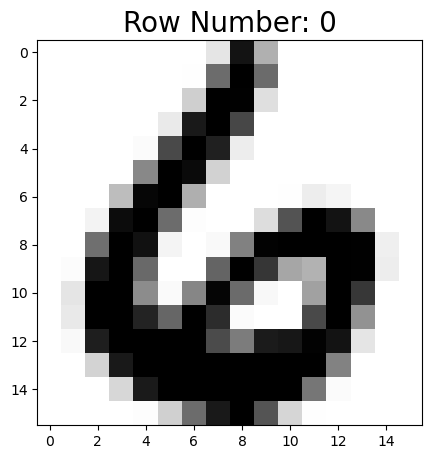

In [33]:
show_image(0)

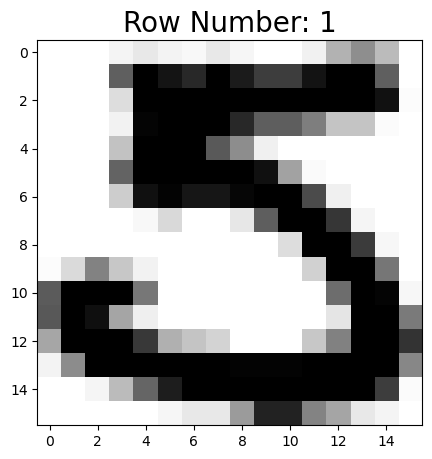

In [34]:

show_image(1)

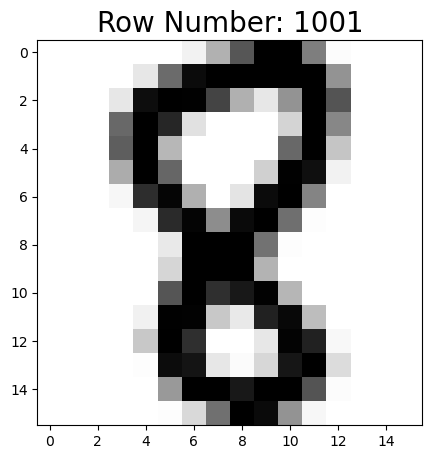

In [35]:
show_image(1001)

# We will prepare the data for model building

In [36]:
#train and test split
from sklearn.model_selection import train_test_split
X=digits_data.drop(columns=[0])
y=digits_data[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5832, 256)
(1459, 256)
(5832,)
(1459,)
